In [2]:
import matplotlib.pyplot as plt
import sqlite3
import networkx as nx
import pandas as pd

db = "data/tweet.db"
con = sqlite3.connect(db)

#### Tweet statistics

In [12]:
pd.read_sql_query("""
    SELECT
        (SELECT COUNT(*) FROM Tweet_Retweet) AS RetweetCount,
        (SELECT COUNT(*) FROM Tweet_Text) AS TweetCount,
        (SELECT COUNT(*) FROM TweetReference WHERE ReferenceTypeCode = 'Qu') AS QuoteCount,
        (SELECT COUNT(*) FROM TweetReference WHERE ReferenceTypeCode = 'Re') AS ReplyCount
""", con)


,RetweetCount,TweetCount,QuoteCount,ReplyCount
0,23165040,18605316,2967887,10262499


In [13]:
pd.read_sql_query(
    """
    SELECT  Language,
            TweetCount,
            printf
            (
                "%.2f %", 
                (TweetCount*1.0 / CountTotal*1.0) * 100
            ) AS Percentage
    FROM
    (
        SELECT  Lang        AS Language, 
                COUNT(*)    AS TweetCount,
                (
                    SELECT COUNT(*) 
                    FROM Tweet_Text
                )           AS CountTotal
        FROM Tweet_Text
        GROUP BY Lang
        ORDER BY TweetCount DESC
    )
    """,
    con
)

,Language,TweetCount,Percentage
0,en,12017538,64.59 %
1,und,995044,5.35 %
2,es,871341,4.68 %
3,de,726922,3.91 %
4,fr,650859,3.50 %
...,...,...,...
61,dv,49,0.00 %
62,sd,44,0.00 %
63,lo,14,0.00 %
64,bo,9,0.00 %


#### Account statistics

In [ ]:
pd.read_sql_query(
    "SELECT COUNT(*) AS TotalAccounts FROM Account",
    con
)

,TotalAccounts
0,6722770


In [ ]:
pd.read_sql_query(
    "SELECT COUNT(*) AS EnglishTweetAccounts FROM TweetCountSummary WHERE Lang='en' AND Count > 0",
    con
)

,EnglishTweetAccounts
0,2198270


In [15]:
df = pd.read_sql_query(
    """
    SELECT Count, COUNT(*) AS Frequency
    FROM TweetCountSummary
    WHERE Lang='en'
    GROUP BY Count
    ORDER BY Count DESC
    """,
    con
)
df

,Count,Frequency
0,51509,1
1,24836,1
2,21094,1
3,16116,1
4,13057,1
...,...,...
1208,5,69088
1209,4,101758
1210,3,168796
1211,2,342525


In [16]:
df["pdf"] = df["Frequency"] / sum(df["Frequency"])
df["cdf"] = df["pdf"].cumsum()
df

,Count,Frequency,pdf,cdf
0,51509,1,4.549032e-07,4.549032e-07
1,24836,1,4.549032e-07,9.098063e-07
2,21094,1,4.549032e-07,1.364710e-06
3,16116,1,4.549032e-07,1.819613e-06
4,13057,1,4.549032e-07,2.274516e-06
...,...,...,...,...
1208,5,69088,3.142835e-02,1.870944e-01
1209,4,101758,4.629004e-02,2.333844e-01
1210,3,168796,7.678584e-02,3.101703e-01
1211,2,342525,1.558157e-01,4.659860e-01


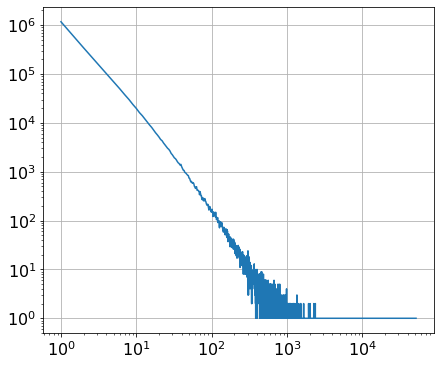

In [38]:
df.plot(kind="line", x="Count", y="Frequency", loglog=True, figsize=(7,6), fontsize=16, grid=True, xlabel='', legend=False)
plt.show()


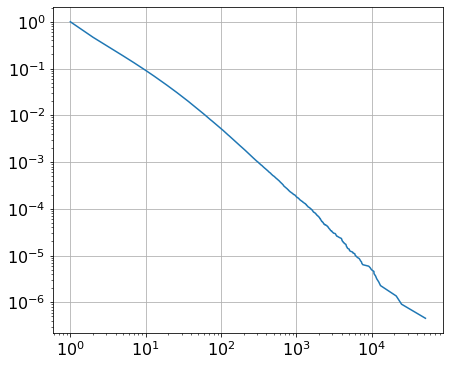

In [37]:

df.plot(kind="line", x="Count", y="cdf", loglog=True, figsize=(7,6), fontsize=16, grid=True, xlabel='', legend=False)
plt.show()

#### Tweet statistics

In [3]:
NETWORK_TYPES = ["retweet", "quote", "reply", "mention"]
EGO_NODES = ["RT_com", "KyivPost", "SputnikInt", "KyivIndependent", "MoscowTimes"]

for network_type in NETWORK_TYPES:
    for ego in EGO_NODES:
        print(f"\n{network_type} / {ego}")
        G = nx.read_edgelist(f"networks/{network_type}_{ego}.edges", create_using = nx.Graph)
        print(G)


retweet / RT_com
Graph with 6782 nodes and 19359 edges

retweet / KyivPost
Graph with 7087 nodes and 39269 edges

retweet / SputnikInt
Graph with 1007 nodes and 1955 edges

retweet / KyivIndependent
Graph with 70538 nodes and 756833 edges

retweet / MoscowTimes
Graph with 1500 nodes and 5955 edges

quote / RT_com
Graph with 2535 nodes and 5553 edges

quote / KyivPost
Graph with 1526 nodes and 5223 edges

quote / SputnikInt
Graph with 308 nodes and 581 edges

quote / KyivIndependent
Graph with 17932 nodes and 103631 edges

quote / MoscowTimes
Graph with 471 nodes and 1920 edges

reply / RT_com
Graph with 4611 nodes and 7350 edges

reply / KyivPost
Graph with 1135 nodes and 1343 edges

reply / SputnikInt
Graph with 367 nodes and 394 edges

reply / KyivIndependent
Graph with 21199 nodes and 50253 edges

reply / MoscowTimes
Graph with 484 nodes and 554 edges

mention / RT_com
Graph with 9664 nodes and 37453 edges

mention / KyivPost
Graph with 2252 nodes and 8069 edges

mention / SputnikI